# Titanic-Survival : Exploratory Data Analysis & Machine Learning

## Summary :
**1 | Introduction**
*     1.1 Introduction to the dataset and the topic
*     1.2 First datasets observation

** 2 | Data Analysis and Visualisation**
* 2.1 Missing values
* 2.2 Individual features
* 2.3 Relation
* 2.4 Feature engineering
    * Age
    * Children
    * Single/Alone
    * Family size
    * Title  
* 2.5 Correlation

** 3 | Machine Learning**
* 3.1 Impute missing value
    * Age
    * Cabin
    * Embarked
* 3.2 Encode Categorical features
* 3.3 Scaling numerical features
* 3.4 Logistic Regression
* 3.5 Decision Tree
* 3.6 Random Forest
* 3.7 Knn
* 3.8 Svm
* 3.9 Svc

** 4 | Conlusion **  
* How to improve our model
* What is actualy our best model
* Our model is good for generalisation ?


In [89]:
import numpy as np
import pandas as pd
import missingno as msno
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
from collections import OrderedDict #order python dictionnary

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
pal = sns.color_palette("Set2", 10)
sns.set_palette(pal)
#sns.palplot(pal)

In [90]:
#import datasets
#import datasets
#TitanicTrain = pd.read_csv("/home/nicolas/Notebook/Data/train.csv")
TitanicTrain = pd.read_csv("../input/train.csv")
TitanicTrain['Type'] = 'Train'
#TitanicSubmission = pd.read_csv("/home/nicolas/Notebook/Data/test.csv")
TitanicSubmission = pd.read_csv("../input/test.csv")
TitanicSubmission['Type'] = 'Test'
TitanicSubmission['Survived'] = np.NaN
Titanic = pd.concat([TitanicTrain,TitanicSubmission], ignore_index=True)

# 1 | Introduction

**About this Dataset and the competition**  

Overview  
The data has been split into two groups:  

training set (train.csv)  
test set (test.csv)  

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.  

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.  

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.  

**Data Dictionary** 

VariableDefinitionKey survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton  

**Variable Notes**

pclass: A proxy for socio-economic status (SES)    
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

**Basic informations**

In [91]:
TitanicTrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Train
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Train
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Train
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Train
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Train


In [92]:
#TitanicSubmission.head()
TitanicTrain.info()
TitanicTrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Type           891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2 | Data Analysis and Visualisation

**2.1 Missing values**

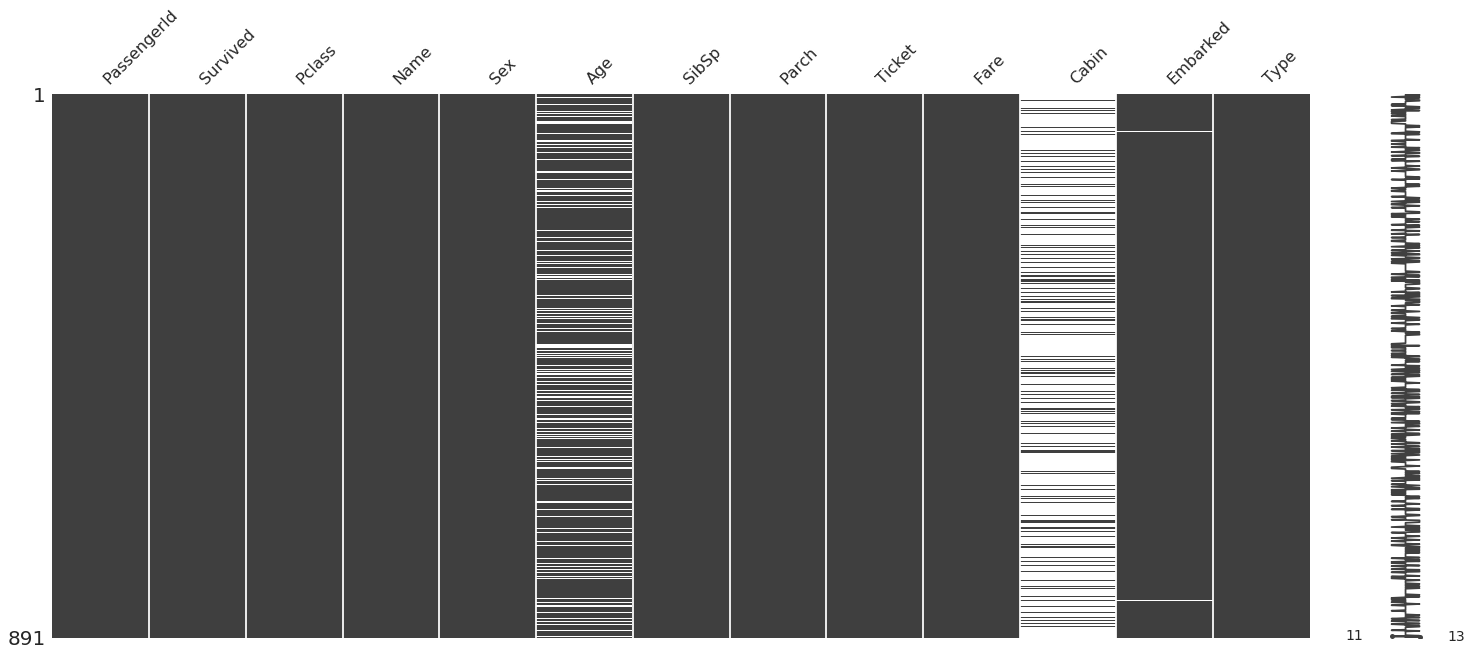

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Type             0
dtype: int64

In [93]:
msno.matrix(TitanicTrain)
TitanicTrain.isnull().sum()
#msno.bar(TitanicTrain)
#msno.heatmap(TitanicTrain)

It looks there are a lot of missing values for Age and Cabin and only 2 for Embarked.   
This is interesting information to impute these missing values later to may be improve our prediction model.


**2.2 Individual features**

In [94]:
columns = TitanicTrain.select_dtypes(include=[np.number]).drop(['PassengerId','Age','Fare'], axis=1).columns.tolist()
#print(columns)

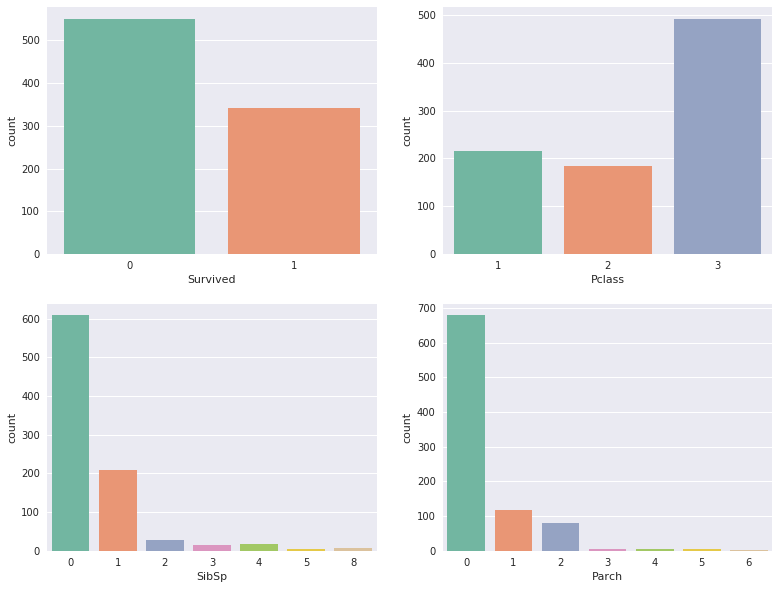

In [95]:
#Distribution
fig = plt.figure(figsize=(13, 10))
for i in range (0,len(columns)):
    fig.add_subplot(2,2,i+1)
    sns.countplot(x=columns[i], data=TitanicTrain);            
plt.show()
fig.clear()

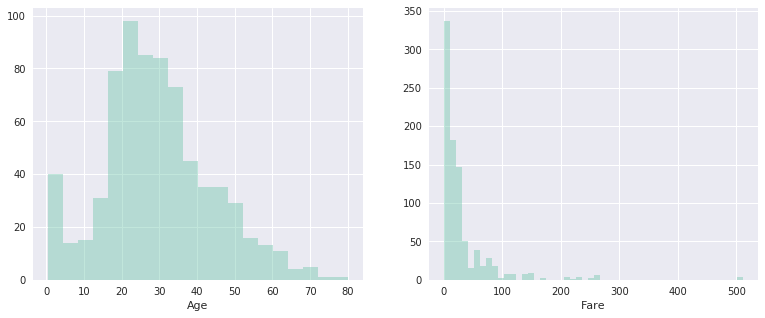

In [96]:
# Age and Fare distribution
i = 1
fig = plt.figure(figsize=(13, 5))
for col in ['Age','Fare']:
    fig.add_subplot(1,2,i)
    sns.distplot(TitanicTrain[col].dropna(),kde=False);
    i += 1
plt.show()
fig.clear()

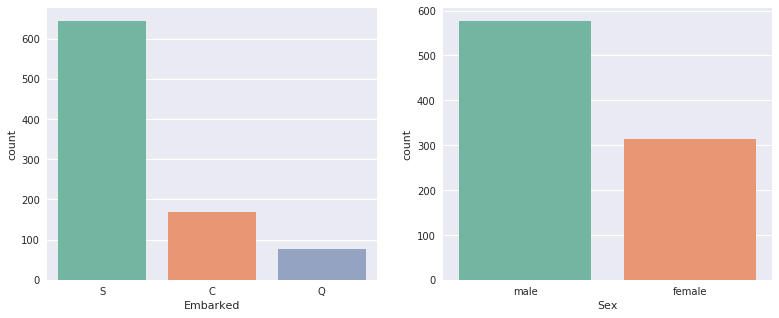

In [97]:
fig = plt.figure(figsize=(13, 5))
#fig.add_subplot(1,2,1)
#sns.countplot(x='Ticket', data=TitanicTrain);
#plt.show()
fig.add_subplot(1,2,1)
sns.countplot(x='Embarked', data=TitanicTrain);
fig.add_subplot(1,2,2)
sns.countplot(x='Sex', data=TitanicTrain);
plt.show()
fig.clear()


**2.3 Relation**

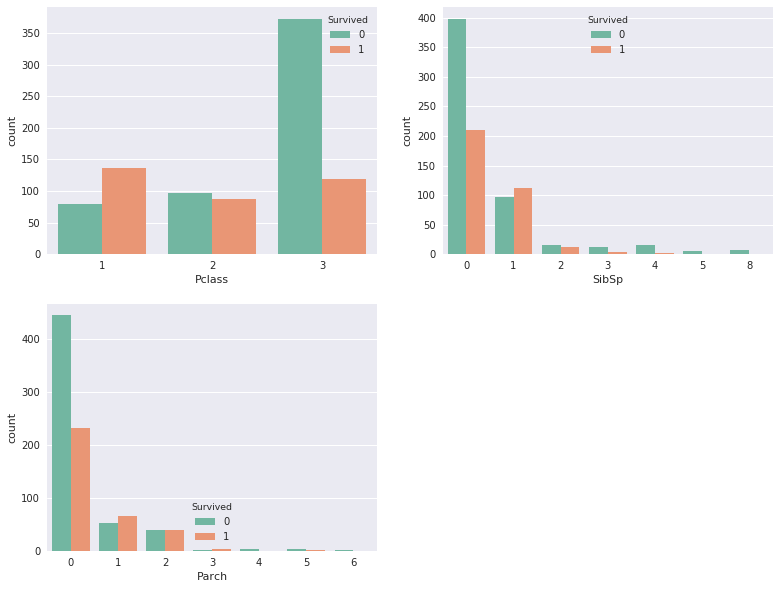

In [98]:
fig = plt.figure(figsize=(13, 10))
i = 1
for col in columns:
    if col != 'Survived':
        fig.add_subplot(2,2,i)
        sns.countplot(x=col, data=TitanicTrain,hue='Survived');
        i += 1
plt.show()
fig.clear()

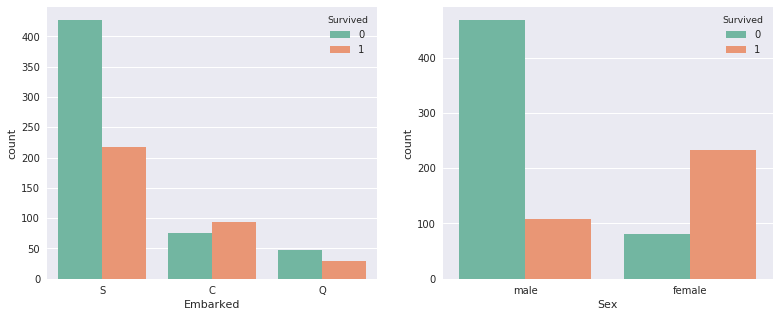

In [99]:
fig = plt.figure(figsize=(13, 5))
fig.add_subplot(1,2,1)
sns.countplot(x='Embarked', data=TitanicTrain,hue='Survived');
fig.add_subplot(1,2,2)
sns.countplot(x='Sex', data=TitanicTrain,hue='Survived');
plt.show()
fig.clear()

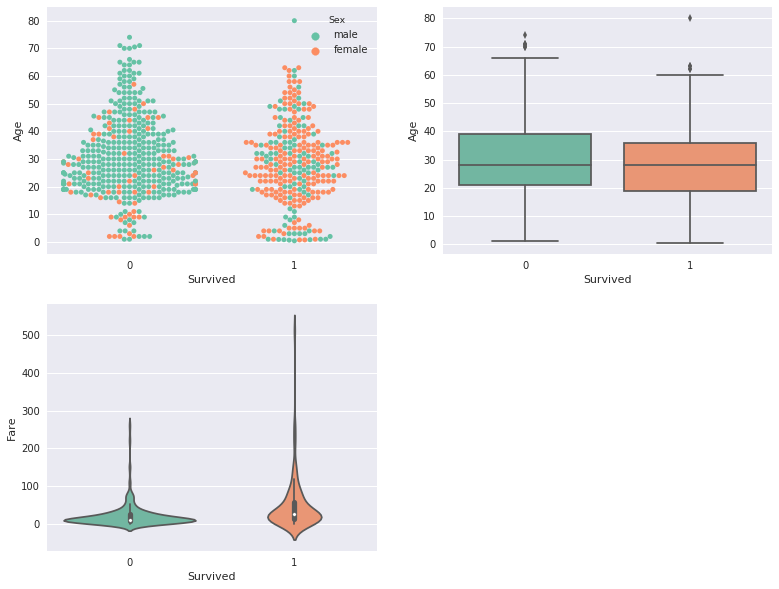

In [100]:
fig = plt.figure(figsize=(13, 10))
# Age and Survived
fig.add_subplot(2,2,1)
sns.swarmplot(x="Survived", y="Age", hue="Sex", data=TitanicTrain);
fig.add_subplot(2,2,2)
sns.boxplot(x="Survived", y="Age", data=TitanicTrain)
# fare and Survived
fig.add_subplot(2,2,3)
sns.violinplot(x="Survived", y="Fare", data=TitanicTrain)
plt.show()
fig.clear()

** 2.4 Feature engineering**

We going to create some new features from the dataset to see if they can more explain why a passenger survived or not

In [101]:
# Age group
def AgeGroup(age):
    ag = ""
    if age <= 10:
        ag = ":10"
    elif age <= 20:
        ag = "11:20"
    elif age <= 30:
        ag = "21:30"
    elif age <= 40:
        ag = "31:40"
    elif age <= 50:
        ag = "41:50"
    elif age <= 60:
        ag = "51:60"
    elif age <= 60:
        ag = "61:70"
    else:
        ag = "71:"
    return ag
# Mjor or not (I assume the legal age is 18..)
def IsMajor(age):
    if age < 18:
        return 0
    else:
        return 1

Titanic["AgeGroup"] = Titanic.apply(lambda row: AgeGroup(row["Age"]), axis=1)
Titanic["Major"] = Titanic.apply(lambda row: IsMajor(row["Age"]), axis=1)
TitanicTrain = Titanic[Titanic.Type=='Train']
#TitanicTrain.head(1)

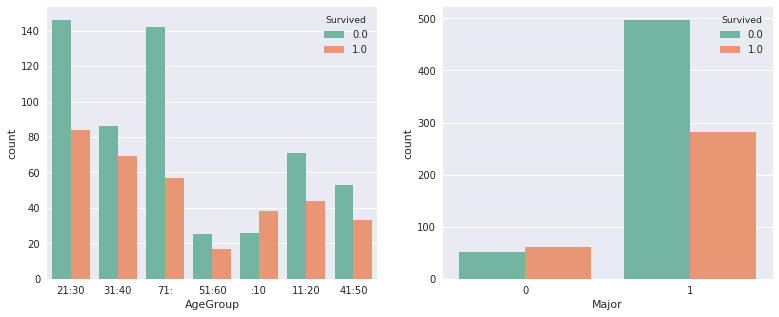

In [102]:
fig = plt.figure(figsize=(13, 5))
# Plot AgeGroup and Major vs Survivedl
fig.add_subplot(1,2,1)
sns.countplot(x='AgeGroup', data=TitanicTrain,hue='Survived');
fig.add_subplot(1,2,2)
sns.countplot(x='Major', data=TitanicTrain,hue='Survived');
plt.show()
fig.clear()

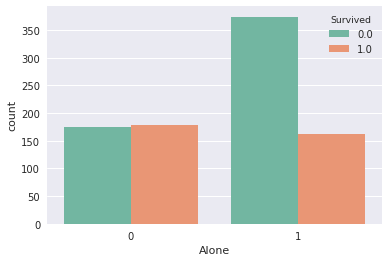

In [103]:
# is Alone or not (boolean value if a passenger travel alone or not)
Titanic["Alone"] = Titanic.apply(lambda obs: 1 if np.sum(obs['SibSp']+obs['Parch']) == 0 else 0, axis=1)
TitanicTrain = Titanic[Titanic.Type=='Train']
#TitanicTrain.Alone.value_counts()
# Plot Alone vs Survived
sns.countplot(x='Alone', data=TitanicTrain,hue='Survived');
plt.show()

It is interesting to see that when you are alone, you are less likely to survive.

In [104]:
# Extract the title of a passenger (Mr,Miss,Mme,Mrs,etc)

title = ['Mlle','Mrs', 'Mr', 'Miss','Master','Don','Rev','Dr','Mme','Ms','Major','Col','Capt','Countess']
def ExtractTitle(name):
    tit = 'missing'
    for item in title :
        if item in name:
            tit = item
    if tit == 'missing':
        tit = 'Mr'
    return tit
"""
title = ['Mrs','Mr', 'Miss' ,'Master']
def ExtractTitle(name):
    tit = 'other'
    for item in title:
        if item in name:
            tit = item
    return tit
"""
Titanic["Title"] = Titanic.apply(lambda row: ExtractTitle(row["Name"]),axis=1)
TitanicTrain = Titanic[Titanic.Type=='Train']
# in 1 ligne but not perfect..
#TitanicTrain["Title"] = TitanicTrain.Name.apply(lambda obs: obs.split(' ')[1])
#TitanicTrain.head(1)
TitanicTrain.Title.value_counts()
#TitanicTrain[TitanicTrain["Title"].isnull()].head(4)

Mr          635
Miss        180
Master       40
Dr           11
Col          10
Rev           6
Don           2
Major         2
Countess      1
Mlle          1
Mme           1
Capt          1
Ms            1
Name: Title, dtype: int64

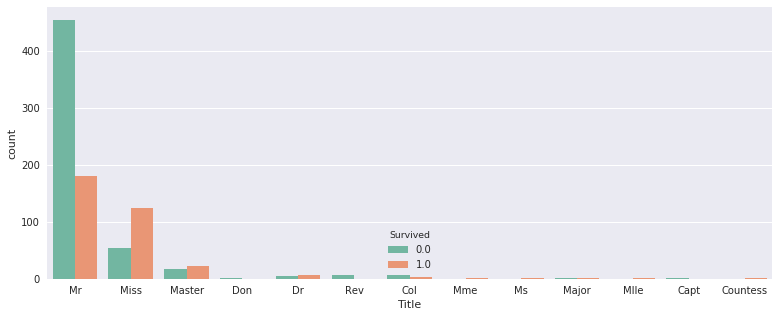

In [105]:
plt.figure(figsize=(13, 5))
sns.countplot(x='Title', data=TitanicTrain,hue='Survived');
plt.show()

Actualy I'm not sure that the "Title" feature give me more information than the sex feature !

In [106]:
#Family size
Titanic["Fsize"] = Titanic['SibSp']+Titanic['Parch']+1
TitanicTrain = Titanic[Titanic.Type=='Train']

In [107]:
fig = plt.figure(figsize=(13, 5))

** 2.5 Correlation**

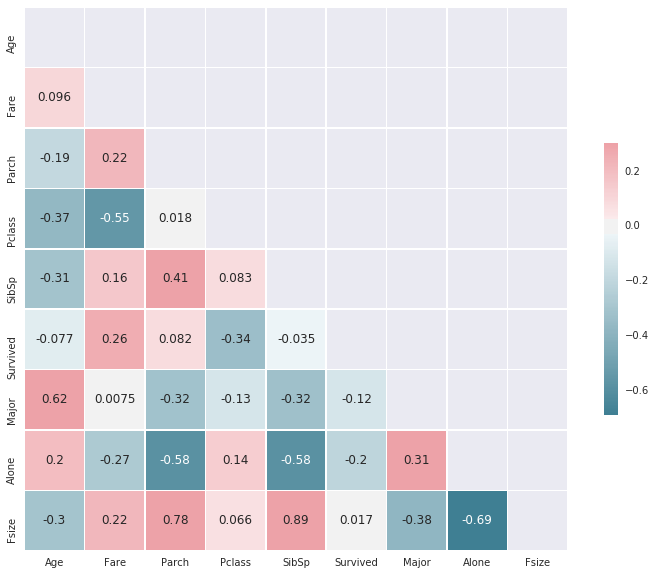

In [108]:
# correlations with the new features
corr = TitanicTrain.drop(['PassengerId'], axis=1).corr()
#sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,annot=True, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


# 3 | Machine Learning

**3.1 Impute missing values**

In [109]:
# Age
MeanAge = TitanicTrain.Age.mean()
#print(MeanAge)
MedianAge = TitanicTrain.Age.median()
#print(MedianAge)
Titanic.Age = Titanic.Age.fillna(value=MedianAge)

Titanic["AgeGroup"] = Titanic.apply(lambda row: AgeGroup(row["Age"]), axis=1)
Titanic["Major"] = Titanic.apply(lambda row: IsMajor(row["Age"]), axis=1)


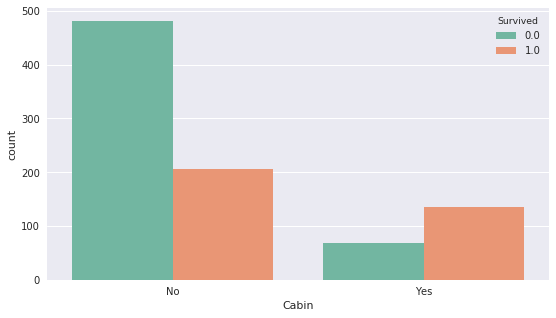

In [110]:
# Cabin
Titanic["Cabin"] = Titanic.apply(lambda obs: "No" if pd.isnull(obs['Cabin']) else "Yes", axis=1)
TitanicTrain = Titanic[Titanic.Type=='Train']
plt.figure(figsize=(9, 5))
sns.countplot(x='Cabin', data=TitanicTrain,hue='Survived');
plt.show()

In [111]:
#TitanicTrain.isnull().sum()

In [112]:
# Embarked
# replace NaN with the mode value
ModeEmbarked = TitanicTrain.Embarked.mode()[0]
#print(type(ModeEmbarked))
#print(ModeEmbarked)
Titanic.Embarked = Titanic.Embarked.fillna(value=ModeEmbarked)
print(Titanic.Embarked.value_counts())

S    916
C    270
Q    123
Name: Embarked, dtype: int64


In [113]:
#Titanic.isnull().sum()

In [114]:
# Fare have 1 NaN missing value on the Submission dataset
MedianFare = TitanicTrain.Fare.median()
Titanic.Fare = Titanic.Fare.fillna(value=MedianFare)
#Titanic.isnull().sum()

**3.2 Encode Categorical Features**

In [115]:
print(Titanic.columns)

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Type', 'AgeGroup',
       'Major', 'Alone', 'Title', 'Fsize'],
      dtype='object')


In [116]:
SubmissionPassengerId = Titanic[Titanic.Type=='Test']['PassengerId']
Titanic = pd.get_dummies(Titanic.drop(['PassengerId','Name','Ticket'],axis=1),drop_first=True,columns=['AgeGroup','Sex','Title','Cabin','Embarked'])
print(Titanic.columns.tolist())

['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'Type', 'Major', 'Alone', 'Fsize', 'AgeGroup_21:30', 'AgeGroup_31:40', 'AgeGroup_41:50', 'AgeGroup_51:60', 'AgeGroup_71:', 'AgeGroup_:10', 'Sex_male', 'Title_Col', 'Title_Countess', 'Title_Don', 'Title_Dr', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Ms', 'Title_Rev', 'Cabin_Yes', 'Embarked_Q', 'Embarked_S']


In [117]:
Titanic.head(2)

,Age,Fare,Parch,Pclass,SibSp,Survived,Type,Major,Alone,Fsize,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Cabin_Yes,Embarked_Q,Embarked_S
0,22.0,7.2500,0,3,1,0.0,Train,1,0,2,...,0,0,0,0,1,0,0,0,0,1
1,38.0,71.2833,0,1,1,1.0,Train,1,0,2,...,0,0,0,0,1,0,0,1,0,0


In [118]:
#Titanic.isnull().sum()

**3.3 Scaling numerical features**

In [119]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler().fit(Titanic[['Age', 'Fare']])
Titanic[['Age', 'Fare']] = scale.transform(Titanic[['Age', 'Fare']])


In [120]:
Titanic.head(4)

,Age,Fare,Parch,Pclass,SibSp,Survived,Type,Major,Alone,Fsize,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Cabin_Yes,Embarked_Q,Embarked_S
0,-0.581628,-0.503291,0,3,1,0.0,Train,1,0,2,...,0,0,0,0,1,0,0,0,0,1
1,0.658652,0.734744,0,1,1,1.0,Train,1,0,2,...,0,0,0,0,1,0,0,1,0,0
2,-0.271558,-0.490240,0,3,0,1.0,Train,1,1,1,...,0,1,0,0,0,0,0,0,0,1
3,0.426099,0.383183,0,1,1,1.0,Train,1,0,2,...,0,0,0,0,1,0,0,1,0,1


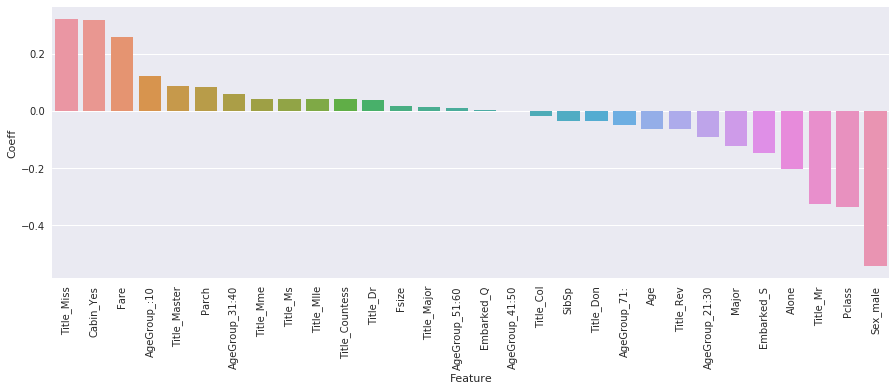

In [121]:
    # plot sorting correlations 
    TitanicTrain = Titanic[Titanic.Type=='Train']
    dfcor = TitanicTrain.corr()["Survived"].to_frame().sort_values(by=['Survived'],ascending=False)
    dfcor.reset_index(level=0, inplace=True)
    dfcor.columns = ['Feature', 'Coeff']
    dfcor = dfcor[dfcor.Feature != "Survived"]
    #print(dfcor.head())
    plt.figure(figsize=(15, 5))
    sns.barplot(x='Feature', y='Coeff', data= dfcor);
    plt.xticks(rotation=90) 
    plt.show()

In [122]:
#print(TitanicTrain.corr()["Survived"])
Target = TitanicTrain.Survived
Features = TitanicTrain.drop(['Survived','Type'],axis=1)

In [123]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size = 0.3, random_state=42)
Target = TitanicTrain.Survived
"""
X_train = TitanicTrain.drop(['Survived','Type'],axis=1)
X_test = TitanicTrain.drop(['Survived','Type'],axis=1)
y_train = TitanicTrain.Survived
y_test = TitanicTrain.Survived
"""

"\nX_train = TitanicTrain.drop(['Survived','Type'],axis=1)\nX_test = TitanicTrain.drop(['Survived','Type'],axis=1)\ny_train = TitanicTrain.Survived\ny_test = TitanicTrain.Survived\n"

In [124]:
MlRes= {}
def MlResult(model,score):
    MlRes[model] = score
    print(MlRes)
#MlResult('AlgoName',accuracyscore)

In [125]:
roc_curve_data = {}
def ConcatRocData(algoname, fpr, tpr, auc):
    data = [fpr, tpr, auc]
    roc_curve_data[algoname] = data


In [126]:
"""
#We need to have same columns on the training dataset and the test dataset
def AlignShape(dfok,dfko):
    colok = dfok.columns.tolist()
    colko = dfko.columns.tolist()
    for c in colok:
        if c not in colko:
            dfko[c] = 0
    return dfko
TitanicSubmission= AlignShape(TitanicTrain,TitanicSubmission)
"""
TitanicSubmission = Titanic[Titanic.Type=='Test'].drop(['Survived','Type'],axis=1)

**3.4 Logistic Regression Classifier**

In [127]:
# Import Logistic Regression from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

In [128]:
# Logistic Regression : 
logi_reg = LogisticRegression()
# Fit the regressor to the training data
logi_reg.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = logi_reg.predict(X_test)

In [129]:
# Score / Metrics
accuracy = logi_reg.score(X_test, y_test) # = accuracy
print("Score Logistic Regression : {}".format(accuracy))
print("Accuracy Logistic Regression : {}".format(accuracy_score(y_test, y_pred)))
auc = roc_auc_score(y_test, y_pred)
print("Roc auc score Logistic Regression: {}".format(auc))

Score Logistic Regression : 0.8171641791044776
Accuracy Logistic Regression : 0.8171641791044776
Roc auc score Logistic Regression: 0.8069948929821542


In [130]:
MlResult('Logistic Regression',accuracy)

{'Logistic Regression': 0.81716417910447758}


In [131]:
# Confusion Matrix with sklearn :
print("Confusion matrix and Classification Report for the Logistic Regression model :")
cm = confusion_matrix(y_test,y_pred)
print(cm)
cla = classification_report(y_test, y_pred)
print(cla)

Confusion matrix and Classification Report for the Logistic Regression model :
[[136  21]
 [ 28  83]]
             precision    recall  f1-score   support

        0.0       0.83      0.87      0.85       157
        1.0       0.80      0.75      0.77       111

avg / total       0.82      0.82      0.82       268



85% of not survival (0) prediction are good  => 152 / (152+27)  
80% of survival (1)  prediction are good => 93 / (93+23)

In [132]:
# Compute predicted probabilities with the logistic regression model: y_pred_prob
y_pred_prob = logi_reg.predict_proba(X_test)[:,1]
# Generate ROC curve values:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ConcatRocData('Logistic Regression', fpr, tpr, auc)

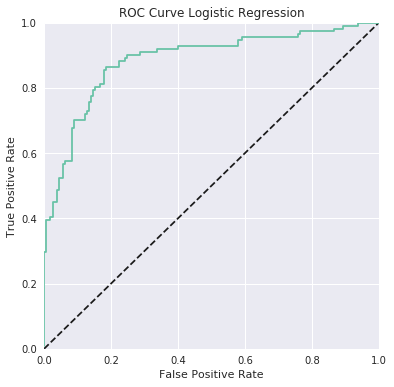

In [133]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.show()

In [134]:
#submission
logi_reg_prediction = logi_reg.predict(TitanicSubmission)
submission = pd.DataFrame({
     "PassengerId": SubmissionPassengerId,  #id from the test dataset
        "Survived": logi_reg_prediction.astype(int)      #prediction compute from the test dataset
    })
#submission.to_csv('logi_reg_submission.csv', index=False)

**3.5 Decision Tree Classifier**

In [135]:
# Import Decision Tree Classifier from scikit learn
from sklearn.tree import DecisionTreeClassifier

In [136]:
dtc = DecisionTreeClassifier()
# Fit the regressor to the training data
dtc.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = dtc.predict(X_test)

In [137]:
# Score / Metrics
accuracy = dtc.score(X_test, y_test) # = accuracy
print("Score Decision Tree : {}".format(accuracy))
print("Accuracy Decision Tree : {}".format(accuracy_score(y_test, y_pred)))
auc = roc_auc_score(y_test, y_pred)
print("Roc auc score Decision Tree : {}".format(auc))

Score Decision Tree : 0.7388059701492538
Accuracy Decision Tree : 0.7388059701492538
Roc auc score Decision Tree : 0.7308773741894762


In [138]:
MlResult('Decision Tree',accuracy)

{'Logistic Regression': 0.81716417910447758, 'Decision Tree': 0.73880597014925375}


In [139]:
# Confusion Matrix with sklearn :
print("Confusion matrix and Classification Report for the Decision Tree model :")
cm = confusion_matrix(y_test,y_pred)
print(cm)
cla = classification_report(y_test, y_pred)
print(cla)

Confusion matrix and Classification Report for the Decision Tree model :
[[122  35]
 [ 35  76]]
             precision    recall  f1-score   support

        0.0       0.78      0.78      0.78       157
        1.0       0.68      0.68      0.68       111

avg / total       0.74      0.74      0.74       268



In [140]:
# Compute predicted probabilities with the Decision tree model: y_pred_prob
y_pred_prob = dtc.predict_proba(X_test)[:,1]
#print(y_pred_prob.shape)
#print(y_pred_prob[5:])
# Generate ROC curve values:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ConcatRocData('Decision Tree', fpr, tpr, auc)

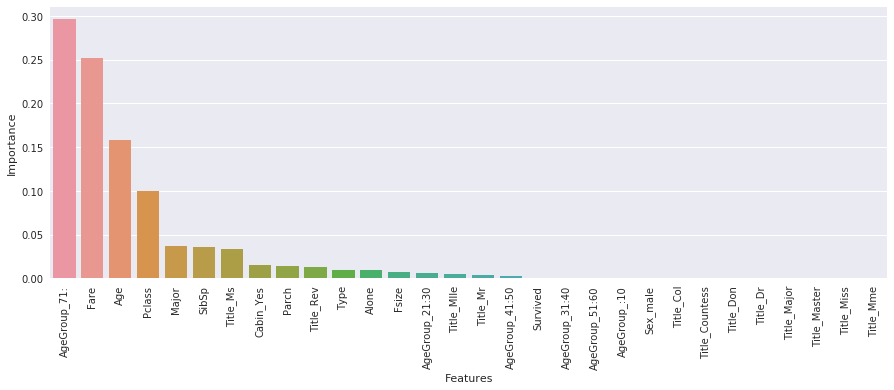

In [141]:
#Features importance
def FeaturesImportance(data,model):
    features = data.columns.tolist()
    fi = model.feature_importances_
    sorted_features = {}
    for feature, imp in zip(features, fi):
        sorted_features[feature] = round(imp,3)

    # sort the dictionnary by value
    sorted_features = OrderedDict(sorted(sorted_features.items(),reverse=True, key=lambda t: t[1]))

    #for feature, imp in sorted_features.items():
        #print(feature+" : ",imp)

    dfvi = pd.DataFrame(list(sorted_features.items()), columns=['Features', 'Importance'])
    #dfvi.head()
    plt.figure(figsize=(15, 5))
    sns.barplot(x='Features', y='Importance', data=dfvi);
    plt.xticks(rotation=90) 
    plt.show()

FeaturesImportance(TitanicTrain,dtc)

In [142]:
#submission
dtc_prediction = dtc.predict(TitanicSubmission)
submission = pd.DataFrame({
     "PassengerId": SubmissionPassengerId,  #id from the test dataset
        "Survived": dtc_prediction.astype(int)      #prediction compute from the test dataset
    })
#submission.to_csv('dtc_submission.csv', index=False)

In [143]:
# compare roc curve from multiple models
def PlotMultipleRocCurve(roc_curve_data): 
    plt.figure(figsize=(10, 10))
    for algo,rocdata in roc_curve_data.items():
        plt.plot(rocdata[0], rocdata[1], label=str(format(rocdata[2], '.3f'))+" : "+algo)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and Auc Score for each Model')
    plt.legend(borderaxespad=0.5,loc=4)
    plt.show()

**3.6 Random Forest Classifier**

In [144]:
 # Import Random Forest Classifier scikit learn
from sklearn.ensemble import RandomForestClassifier

In [145]:
# Create a random Forest Classifier instance
rfc = RandomForestClassifier(n_estimators=100)
# Fit to the training data
rfc.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = rfc.predict(X_test)

In [146]:
# Score / Metrics
accuracy = rfc.score(X_test, y_test) # = accuracy
print("Score Random Forest on test Data : {}".format(accuracy))
print("Score Random Forest on training Data : {}".format(rfc.score(X_train, y_train)))
print("Accuracy Random Forest : {}".format(accuracy_score(y_test, y_pred)))
auc = roc_auc_score(y_test, y_pred)
print("Roc auc score Random Forest : {}".format(auc))

Score Random Forest on test Data : 0.7947761194029851
Score Random Forest on training Data : 0.9823434991974318
Accuracy Random Forest : 0.7947761194029851
Roc auc score Random Forest : 0.7812876570838354


In [147]:
MlResult('Random Forest',accuracy)

{'Logistic Regression': 0.81716417910447758, 'Decision Tree': 0.73880597014925375, 'Random Forest': 0.79477611940298509}


In [148]:
# Confusion Matrix with sklearn :
print("Confusion matrix and Classification Report for the Random Forest model :")
cm = confusion_matrix(y_test,y_pred)
print(cm)
cla = classification_report(y_test, y_pred)
print(cla)

Confusion matrix and Classification Report for the Random Forest model :
[[135  22]
 [ 33  78]]
             precision    recall  f1-score   support

        0.0       0.80      0.86      0.83       157
        1.0       0.78      0.70      0.74       111

avg / total       0.79      0.79      0.79       268



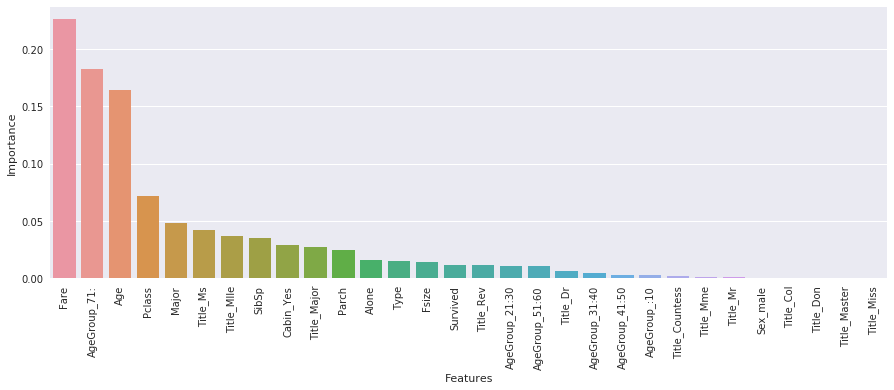

In [149]:
#Features importance
FeaturesImportance(TitanicTrain,rfc)

In [150]:
# Compute predicted probabilities with the Random Forest model: y_pred_prob
y_pred_prob = rfc.predict_proba(X_test)[:,1]
#print(y_pred_prob.shape)
#print(y_pred_prob[5:])
# Generate ROC curve values:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ConcatRocData('Random Forest', fpr, tpr, auc)

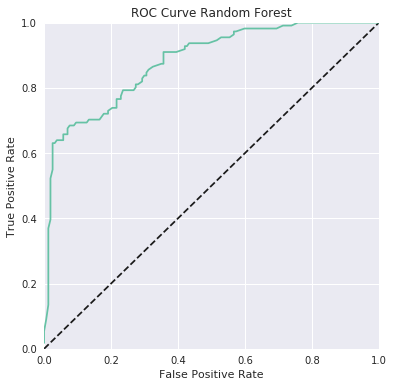

In [151]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.show()

In [152]:
#submission
rfc_prediction = rfc.predict(TitanicSubmission)
submission = pd.DataFrame({
     "PassengerId": SubmissionPassengerId,  #id from the test dataset
        "Survived": rfc_prediction.astype(int)      #prediction compute from the test dataset
    })
#submission.to_csv('rfc_submission.csv', index=False)

**3.7 Knn Classifier**

In [153]:
 # Import KNeighbors Classifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier 

In [154]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier()
# Fit to the training data
knn.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = knn.predict(X_test)

In [155]:
# Score / Metrics
accuracy = knn.score(X_test, y_test) # = accuracy
print("Score KNeighbors on test data : {}".format(accuracy))
print("Score KNeighbors on train data : {}".format(knn.score(X_train, y_train)))
print("Accuracy KNeighbors on test data : {}".format(accuracy_score(y_test, y_pred)))
auc = roc_auc_score(y_test, y_pred)
print("Roc auc score KNeighbors on test data : {}".format(auc))

Score KNeighbors on test data : 0.746268656716418
Score KNeighbors on train data : 0.8475120385232745
Accuracy KNeighbors on test data : 0.746268656716418
Roc auc score KNeighbors on test data : 0.7200895162678602


In [156]:
MlResult('KNeighbors',accuracy)

{'Logistic Regression': 0.81716417910447758, 'Decision Tree': 0.73880597014925375, 'Random Forest': 0.79477611940298509, 'KNeighbors': 0.74626865671641796}


In [157]:
# Confusion Matrix with sklearn :
print("Confusion matrix and Classification Report for the KNeighbors model :")
cm = confusion_matrix(y_test,y_pred)
print(cm)
cla = classification_report(y_test, y_pred)
print(cla)

Confusion matrix and Classification Report for the KNeighbors model :
[[137  20]
 [ 48  63]]
             precision    recall  f1-score   support

        0.0       0.74      0.87      0.80       157
        1.0       0.76      0.57      0.65       111

avg / total       0.75      0.75      0.74       268



In [158]:
# Compute predicted probabilities with the Random Forest model: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]
#print(y_pred_prob.shape)
#print(y_pred_prob[5:])
# Generate ROC curve values:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ConcatRocData('KNeighbors', fpr, tpr, auc)

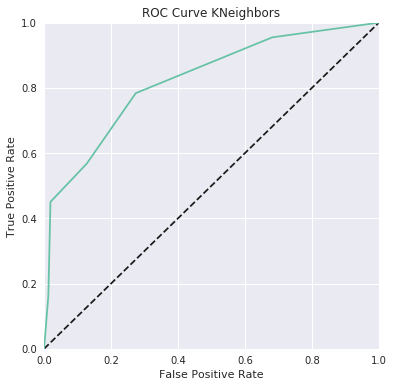

In [159]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNeighbors')
plt.show()

In [160]:
#submission
knn_prediction = knn.predict(TitanicSubmission)
submission = pd.DataFrame({
     "PassengerId": SubmissionPassengerId,  #id from the test dataset
        "Survived": knn_prediction.astype(int)      #prediction compute from the test dataset
    })
#submission.to_csv('knn_submission.csv', index=False)

**3.8 Support Vector Machines (SVM)**

In [161]:
 # Import svm Classifier from scikit learn
from sklearn.svm import SVC, LinearSVC

In [162]:
# Create a k-NN classifier with 6 neighbors: knn
svm =SVC(probability=True)
# Fit to the training data
svm.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = svm.predict(X_test)

In [163]:
# Score / Metrics
accuracy = svm.score(X_test, y_test) # = accuracy
print("Score Support Vector Machines on test data : {}".format(accuracy))
print("Score Support Vector Machines on train data : {}".format(svm.score(X_train, y_train)))
print("Accuracy Support Vector Machines on test data : {}".format(accuracy_score(y_test, y_pred)))
auc = roc_auc_score(y_test, y_pred)
print("Roc auc score Support Vector Machines on test data : {}".format(auc))

Score Support Vector Machines on test data : 0.8283582089552238
Score Support Vector Machines on train data : 0.8330658105939005
Accuracy Support Vector Machines on test data : 0.8283582089552238
Roc auc score Support Vector Machines on test data : 0.8139094508521261


In [164]:
MlResult('Support Vector Machines',accuracy)

{'Logistic Regression': 0.81716417910447758, 'Decision Tree': 0.73880597014925375, 'Random Forest': 0.79477611940298509, 'KNeighbors': 0.74626865671641796, 'Support Vector Machines': 0.82835820895522383}


In [165]:
# Confusion Matrix with sklearn :
print("Confusion matrix and Classification Report for the Support Vector Machines model :")
cm = confusion_matrix(y_test,y_pred)
print(cm)
cla = classification_report(y_test, y_pred)
print(cla)

Confusion matrix and Classification Report for the Support Vector Machines model :
[[141  16]
 [ 30  81]]
             precision    recall  f1-score   support

        0.0       0.82      0.90      0.86       157
        1.0       0.84      0.73      0.78       111

avg / total       0.83      0.83      0.83       268



In [166]:
# Compute predicted probabilities with the Support Vector Machines model: y_pred_prob
y_pred_prob = svm.predict_proba(X_test)[:,1]
#print(y_pred_prob.shape)
#print(y_pred_prob[5:])
# Generate ROC curve values:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ConcatRocData('Support Vector Machines', fpr, tpr, auc)

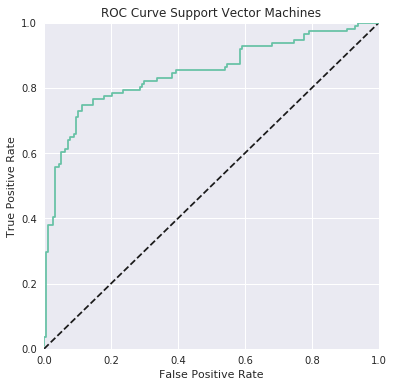

In [167]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Support Vector Machines')
plt.show()

In [168]:
#submission
svm_prediction = svm.predict(TitanicSubmission)
submission = pd.DataFrame({
     "PassengerId": SubmissionPassengerId,  #id from the test dataset
        "Survived": svm_prediction.astype(int)      #prediction compute from the test dataset
    })
#submission.to_csv('svm_submission.csv', index=False)

**3.9 Linear SVC**

In [169]:
# Create a k-NN classifier with 6 neighbors: knn
svc = LinearSVC()
# Fit to the training data
svc.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = svc.predict(X_test)

In [170]:
# Score / Metrics
accuracy = svc.score(X_test, y_test) # = accuracy
print("Score Linear SVC on test data : {}".format(accuracy))
print("Score Linear SVC on train data : {}".format(svc.score(X_train, y_train)))
print("Accuracy Linear SVC on test data : {}".format(accuracy_score(y_test, y_pred)))
auc = roc_auc_score(y_test, y_pred)
print("Roc auc score Linear SVC on test data : {}".format(auc))

Score Linear SVC on test data : 0.8246268656716418
Score Linear SVC on train data : 0.8330658105939005
Accuracy Linear SVC on test data : 0.8246268656716418
Roc auc score Linear SVC on test data : 0.8133643197337465


In [171]:
MlResult('Linear SVC',accuracy)

{'Logistic Regression': 0.81716417910447758, 'Decision Tree': 0.73880597014925375, 'Random Forest': 0.79477611940298509, 'KNeighbors': 0.74626865671641796, 'Support Vector Machines': 0.82835820895522383, 'Linear SVC': 0.82462686567164178}


In [172]:
# Confusion Matrix with sklearn :
print("Confusion matrix and Classification Report for the Linear SVC model :")
cm = confusion_matrix(y_test,y_pred)
print(cm)
cla = classification_report(y_test, y_pred)
print(cla)

Confusion matrix and Classification Report for the Linear SVC model :
[[138  19]
 [ 28  83]]
             precision    recall  f1-score   support

        0.0       0.83      0.88      0.85       157
        1.0       0.81      0.75      0.78       111

avg / total       0.82      0.82      0.82       268



In [173]:
#submission
svc_prediction = svc.predict(TitanicSubmission)
submission = pd.DataFrame({
     "PassengerId": SubmissionPassengerId,  #id from the test dataset
        "Survived": svc_prediction.astype(int)      #prediction compute from the test dataset
    })
#submission.to_csv('svc_submission.csv', index=False)

**Conclusion :**

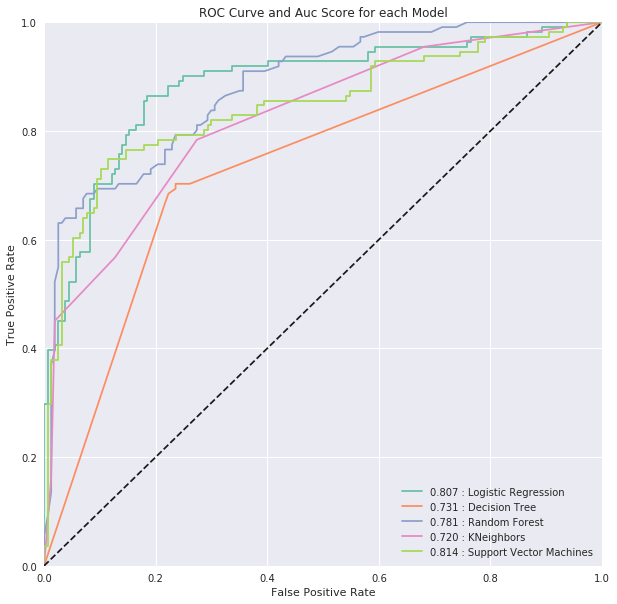

In [174]:
# Roc curve plot with all models
PlotMultipleRocCurve(roc_curve_data)

In [175]:
# print score for each model
#for algo,score in MlRes.items():
#    print(algo+" : {}".format(round(score,3)))
res = pd.DataFrame(list(MlRes.items()), columns=['Model', 'Score']).sort_values("Score", ascending=False)
print(res)

                     Model     Score
4  Support Vector Machines  0.828358
5               Linear SVC  0.824627
0      Logistic Regression  0.817164
2            Random Forest  0.794776
3               KNeighbors  0.746269
1            Decision Tree  0.738806


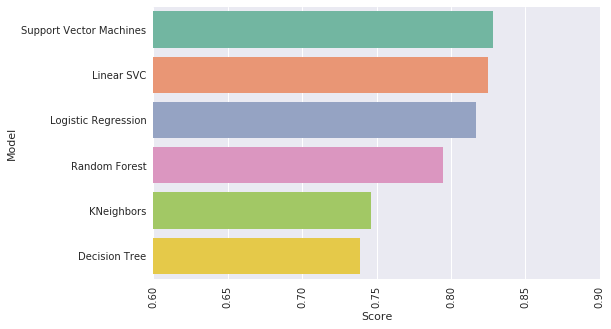

In [176]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Score', y='Model', data=res);
plt.xticks(rotation=90) 
plt.xlim([0.6, 0.9])
plt.show()

Decision three and Random forest seems to give us our best score when I use the all training dataset to fit model but it's actualty clearly overfitted.  
When I use train test split whith 20,25,30%... for testing model on a test dataset not used for training the model, the decision three and the random forest become our badest models..  
Svm seems for to be the betterone and give me the best predictions for the competition.

To improve our code it will be good to use cross validation because our training dataset have very low number of observations to training and to testing at the same time with a classic test train split and it's not good to use all our data to fit a model.  
It would be nice to reduce the number of features. As you can see some features have a zero importance.  
We can also tune parameters for each model.

**This is my first attemp on machine learning so be indulgent ! 
Give me feedback if you want to improve the notebook !**